In [1]:
import numpy as np
import metadynminer as mm
print(f"Loaded metadynminer version {mm.__version__}.")

Loaded metadynminer version 0.6.2


In [2]:
# enable %matplotlib widget for interactivity, if you want:
# %matplotlib widget

In [3]:
# specify the periodicity of your CVs as a python list (for example, if you have two periodic CVs, set periodic = [True, True])
periodic = [True, True]

In [4]:
# load the HILLS file 

# here we should add code for uploading the users file to the server

hills = mm.Hills(name="acealanme", periodic = periodic)

In [5]:
# Calculate the free energy surface from hills file
fes = mm.Fes(hills, resolution=256)

Constructing free energy surface: 100.0% finished



In [6]:
# identify the local minima
minima = mm.Minima(fes)

In [7]:
# print the list of local minima
minima.minima

,Minimum,free energy,CV1bin,CV2bin,CV1 - phi,CV2 - psi
0,A,0.0,77.0,235.0,-1.251728,2.626175
1,B,1.63016,27.0,239.0,-2.478913,2.72435
2,C,2.526665,73.0,117.0,-1.349903,-0.269981
3,D,5.591042,165.0,150.0,0.908117,0.539961
4,E,12.878739,169.0,250.0,1.006291,2.99433


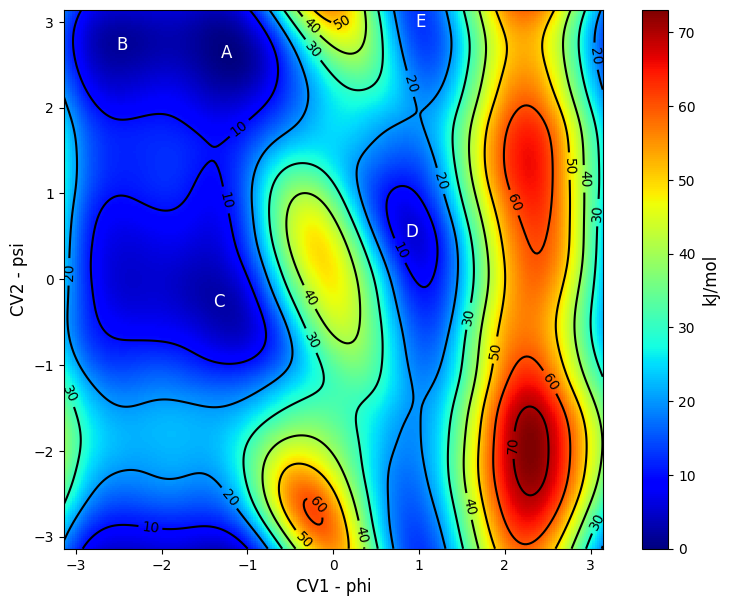

In [8]:
# plot the free energy surface with minima
minima.plot(contours_spacing = 10)

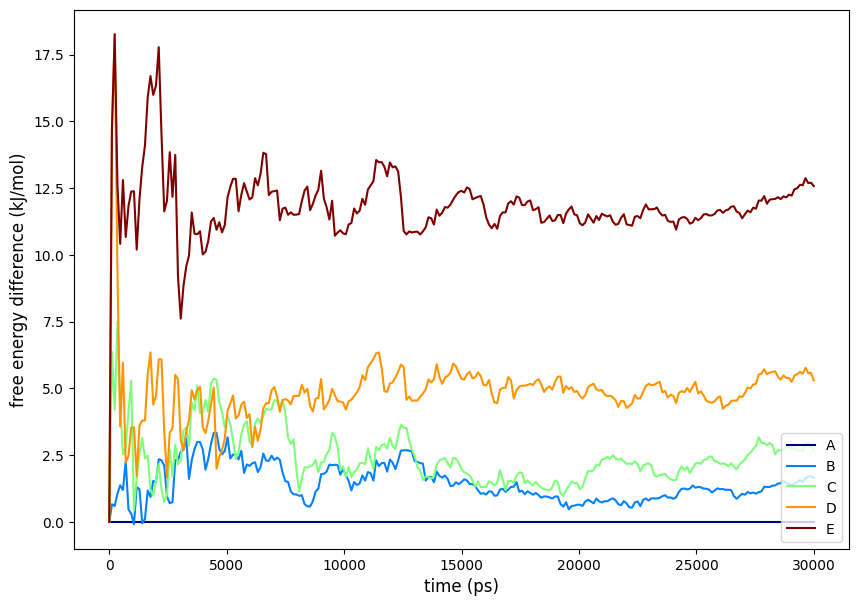

In [9]:
# construct free energy profile
prof = mm.FEProfile(minima,hills)

# plot the free energy profile
prof.plot(legend=True, png_name="fep.png")

In [10]:
# You can remove one CV from existing surface: 
fes_CV1 = fes.removeCV(CV=2)
# You can work with the new FES object like with a new FES: 
minima_1 = mm.Minima(fes_CV1)
minima_1.minima

Removing CV 2.


,Minimum,free energy,CV1bin,CV1 - phi
0,A,0.0,74.0,-1.325359
1,B,1.84462,28.0,-2.454369
2,C,6.367173,166.0,0.93266


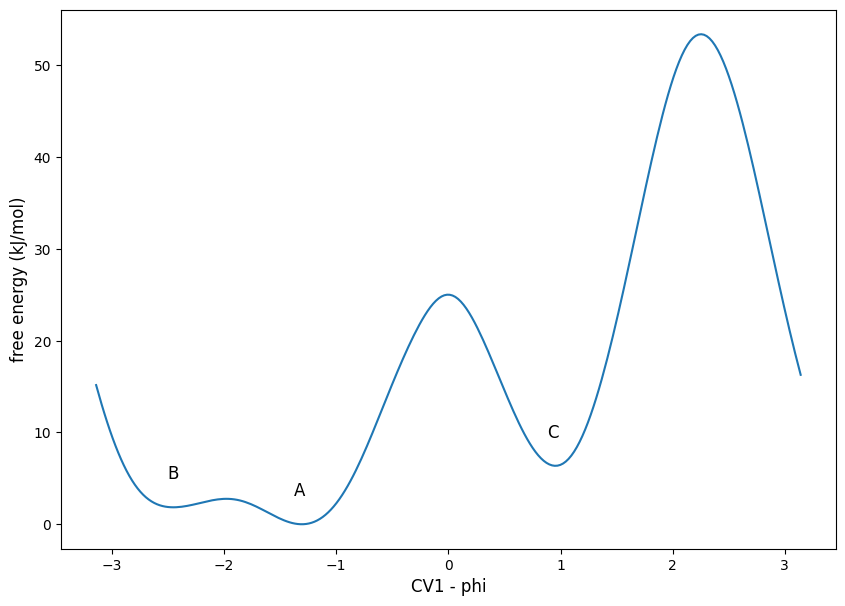

In [11]:
# ... and plot it: 
minima_1.plot()

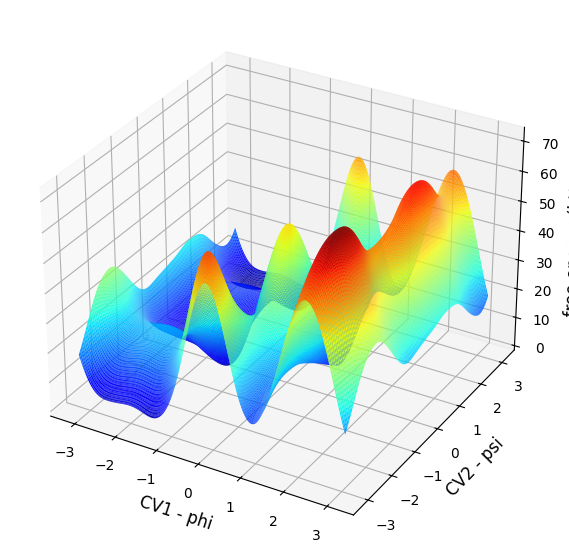

In [12]:
# You can visualize 2D FES as surface plot: 
fes.surface_plot()

Constructing free energy surface: 100.00% finished



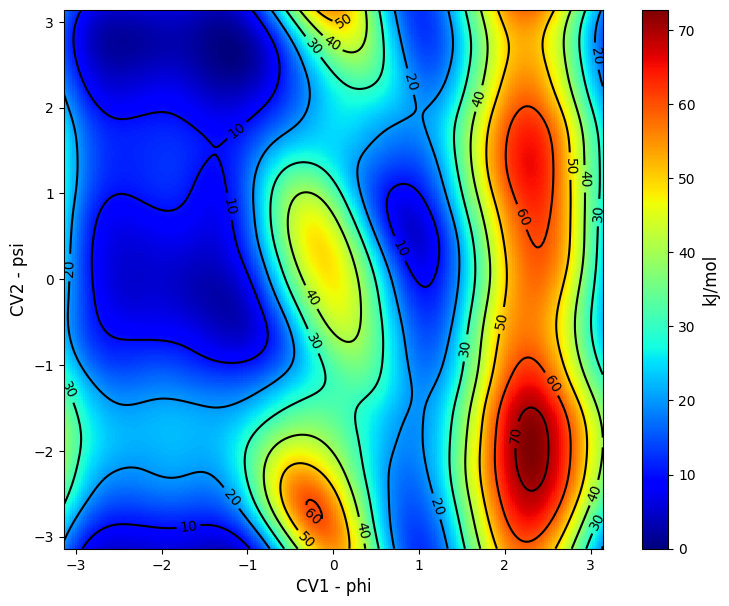

In [14]:
# You can calculate the FES using slower, but exact algorithm with the "original" keyword and plot it: 
fes2 = mm.Fes(hills, resolution=256, original = True)
fes2.plot(contours_spacing = 10)

In [15]:
# It is also possible to make animation of the flooding of FES during the simulation
fes.flooding_animation(step=1000, gif_name = "flooding.gif", fps=10, enable_loop=True, contours_spacing=10, with_minima=True, use_vmax_from_end=False)

Constructing flooding animation: 100.00% finished



<img src="flooding.gif" width="750" align="center">

In [16]:
# You can also plot the difference between two surfaces, for example here between surface calculated with fast or slow algorithm: 
import copy

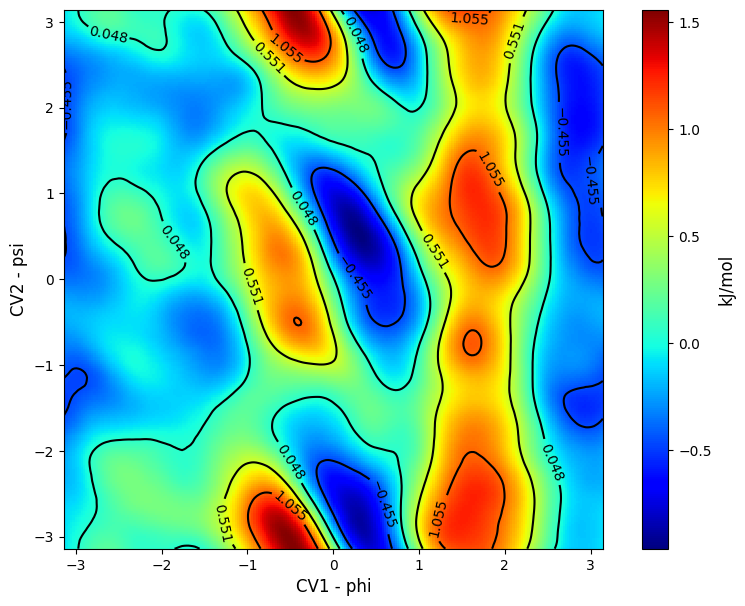

In [17]:
fes_difference = copy.copy(fes)
fes_difference.fes = np.subtract(fes.fes, fes2.fes)
fes_difference.plot(vmin = np.min(fes_difference.fes))